In [ ]:
# 0 - Choose an alogrithm from ray.rllib.algorithms, e.g. ray.rllib.algorithms.xxx as
# xxx
# 1 - Configure the xxx algorithm
# 1.1 - Convert the config to a dict by config.to_dict()
# 1.2 - Examine the config and modify it if needed, e.g. change the "learnign rate"
# to 0.0001, or the framework, or env
# 2 - Create an agent with .build, train it, and examine the training reports report = agent.train()
# 3 - Train the agent,

# 4 - Run a loop for nr_trainings = 50 times agent.train()

# 5 - Visualize the trained agent; This is similar to running the random_agent,
# except that this time we have a trained agent
# 5.1 - Create an environment similar to the training env.
    # 5.2. Let the agent choose an action;
    # 5.3. and pass it to the environment
    # 5.4. How much reward did you get for that action? Keep the score!
    # 5.5. Repeat the 5.{2,3, 4} until the end of the episode
    # visualize the agent
    # continue with the next step without closing the plot

# 5.6. How much total reward you got? What does it mean to have large/small reward?


In [8]:
import gymnasium as gym
from plot_util import visualize_env
# xxx
from ray.rllib.algorithms.dqn import DQNConfig
import matplotlib.pyplot as plt

config = DQNConfig()
config_as_dict = config.to_dict()
config.environment(env="CartPole-v1")
config.framework("tf")

# Directory to store captured images
output_directory = "frames/"

agent = config.build()
reports = agent.train()
print(reports)

nr_trainings = 5
for _ in range(nr_trainings):
    reports = agent.train()
    print(_, reports["episode_reward_mean"])




2023-08-19 18:05:41,504	WARNING util.py:68 -- Install gputil for GPU system monitoring.


{'custom_metrics': {}, 'episode_media': {}, 'info': {'learner': {}, 'num_env_steps_sampled': 1000, 'num_env_steps_trained': 0, 'num_agent_steps_sampled': 1000, 'num_agent_steps_trained': 0}, 'sampler_results': {'episode_reward_max': 54.0, 'episode_reward_min': 10.0, 'episode_reward_mean': 22.953488372093023, 'episode_len_mean': 22.953488372093023, 'episode_media': {}, 'episodes_this_iter': 43, 'policy_reward_min': {}, 'policy_reward_max': {}, 'policy_reward_mean': {}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [11.0, 11.0, 14.0, 11.0, 38.0, 15.0, 36.0, 18.0, 18.0, 41.0, 23.0, 51.0, 20.0, 54.0, 19.0, 22.0, 42.0, 31.0, 16.0, 21.0, 14.0, 17.0, 18.0, 25.0, 18.0, 17.0, 13.0, 28.0, 18.0, 10.0, 35.0, 14.0, 12.0, 46.0, 35.0, 17.0, 29.0, 11.0, 17.0, 34.0, 18.0, 15.0, 14.0], 'episode_lengths': [11, 11, 14, 11, 38, 15, 36, 18, 18, 41, 23, 51, 20, 54, 19, 22, 42, 31, 16, 21, 14, 17, 18, 25, 18, 17, 13, 28, 18, 10, 35, 14, 12, 46, 35, 17, 29, 11, 17, 34, 18, 15, 14]}, 'sampler_perf': {'

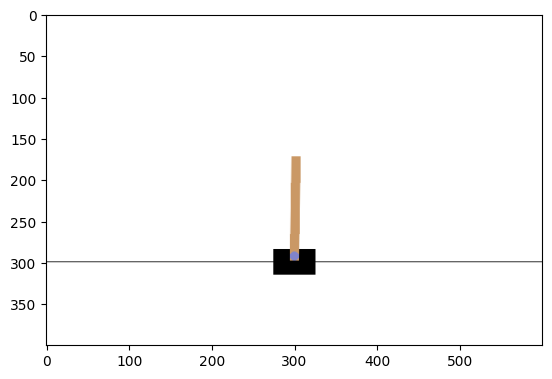

Total reward: 1.0
Good-bye.


In [20]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
s, _ = env.reset()
done = False
cumulative_reward = 0
sc = 0

while not done:
    a = agent.compute_single_action(observation=s, explore=False)
    s, r, terminated, truncated, info = env.step(action=a)

    cumulative_reward += r
    done = terminated or truncated
    # visualize_env(env=env, pause_sec=0.1)
    image_filename = f"{output_directory}frame_{sc:04d}.png"
    sc+=1
    image = env.render()
    plt.imshow(image)  # Display the image (optional)
    plt.savefig(image_filename)
    plt.pause(0.1)
    plt.close()
    break

print("Total reward:", cumulative_reward)

print("Good-bye.")

In [19]:
import imageio
import os

# Path to the directory containing the images
image_directory = "frames/"

# List of image file names
image_files = sorted([file for file in os.listdir(image_directory) if file.endswith(".png")])
print(image_files)

# Create a list of image paths
image_paths = [os.path.join(image_directory, file) for file in image_files]

# Save the GIF animation
output_gif_path = "animation.gif"
with imageio.get_writer(output_gif_path, mode="I", duration=0.1) as writer:
    for image_path in image_paths:
        image = imageio.imread(image_path)
        writer.append_data(image)


['frame_0000.png', 'frame_0001.png', 'frame_0002.png', 'frame_0003.png', 'frame_0004.png', 'frame_0005.png', 'frame_0006.png', 'frame_0007.png', 'frame_0008.png', 'frame_0009.png', 'frame_0010.png', 'frame_0011.png', 'frame_0012.png', 'frame_0013.png', 'frame_0014.png', 'frame_0015.png', 'frame_0016.png', 'frame_0017.png', 'frame_0018.png', 'frame_0019.png', 'frame_0020.png', 'frame_0021.png', 'frame_0022.png', 'frame_0023.png', 'frame_0024.png', 'frame_0025.png', 'frame_0026.png', 'frame_0027.png', 'frame_0028.png', 'frame_0029.png', 'frame_0030.png', 'frame_0031.png', 'frame_0032.png', 'frame_0033.png', 'frame_0034.png', 'frame_0035.png', 'frame_0036.png', 'frame_0037.png', 'frame_0038.png', 'frame_0039.png', 'frame_0040.png', 'frame_0041.png', 'frame_0042.png', 'frame_0043.png', 'frame_0044.png', 'frame_0045.png', 'frame_0046.png', 'frame_0047.png', 'frame_0048.png', 'frame_0049.png', 'frame_0050.png', 'frame_0051.png', 'frame_0052.png', 'frame_0053.png', 'frame_0054.png', 'frame_00

/tmp/ipykernel_706475/3247138100.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)
